In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from scipy.io import wavfile as wav
from scipy.fftpack import fft

Genere una señal de una onda sinusoidal con frecuencia 
de muestreo de 44100 datos por segundo y una frecuencia de 100 Hz (100 oscilaciones por segundo) por 10 s

In [3]:
pi=np.pi

In [4]:
dt=1/44100

In [5]:
dt

2.2675736961451248e-05

In [41]:
dt=1/44100
f=500
w=2*pi*f
t=np.arange(0,10,dt)
signal=3000*np.sin(w*t)
signal=np.int16(signal)
wav.write("./sinusoidal.wav",rate=44100,data=signal)

(0, 0.01)

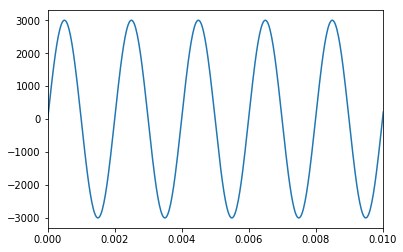

In [38]:
plt.plot(t,signal)
plt.xlim(0,0.01)

In [15]:
def w0(t):
    return 490*t+10

dt=1/44100
f=1000
t=np.arange(0,10,dt)
signal=3000*np.sin(2*pi*w0(t)*t)
signal=np.int16(signal)
wav.write("./sinusoidal2.wav",rate=44100,data=signal)

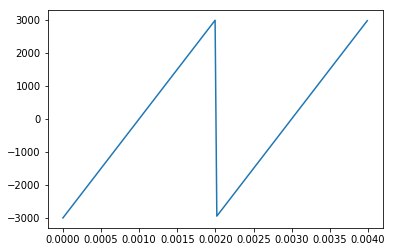

In [25]:
def sierra(t):
    tref=np.mod(t,1/500)
    return 1000*tref-1
t=np.arange(0,2/500,dt)
signal=3000*sierra(t)
plt.plot(t,signal)

In [42]:
def sierra(t):
    tref=np.mod(t,1/500)
    return 1000*tref-1
t=np.arange(0,10,dt)
signal=3000*sierra(t)
signal=np.int16(signal)
wav.write("./sierra.wav",rate=44100,data=signal)

In [43]:
dt=1/44100
f=500
w=2*pi*f
t=np.arange(0,10,dt)
signal=3000*np.sin(w*t)
signal=np.int16(signal)
wav.write("./sinusoidal.wav",rate=44100,data=signal)

In [46]:
sampling,data= wav.read("./sierra.wav")

In [51]:
len(data)

441000

In [49]:
from scipy import fftpack

(0, 10000)

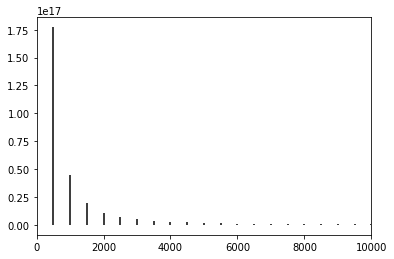

In [53]:
sig_fft = fftpack.fft(data)
power = np.abs(sig_fft)**2
# The corresponding frequencies
sample_freq = fftpack.fftfreq(len(data), d=dt)
plt.vlines(sample_freq, 0,power)
plt.xlim(0,10000)

In [63]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) >=4000] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

In [64]:
filtered_sig

array([ -544.13678408-3.29843412e-13j, -1448.73647569+6.00039645e-14j,
       -2207.88211455+5.42281576e-13j, ...,
        2129.04599725+4.18210142e-13j,  1340.39297419+2.00921602e-13j,
         418.42073943-6.04291222e-13j])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 0.004)

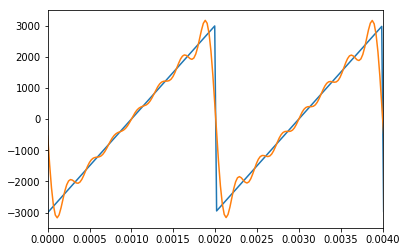

In [65]:
plt.plot(t,data)
plt.plot(t,filtered_sig)
plt.xlim(0,2/500)

In [66]:
signal=np.int16(filtered_sig)
wav.write("./fouriersierra.wav",rate=44100,data=signal)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [78]:
sampling,data= wav.read("./saxo.wav")

In [80]:
data=data[:,0]

In [84]:
data[-200:-100]

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

(0, 3000)

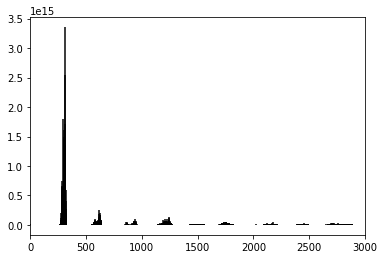

In [74]:
sig_fft = fftpack.fft(data)
power = np.abs(sig_fft)**2
# The corresponding frequencies
sample_freq = fftpack.fftfreq(len(data), d=dt)
plt.vlines(sample_freq, 0,power)
plt.xlim(0,3000)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


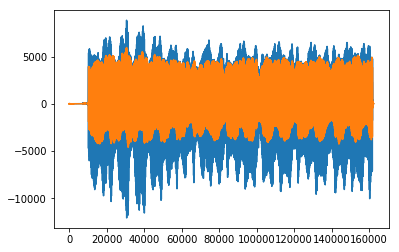

In [86]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) >=1000] = 0
filtered_sig = fftpack.ifft(high_freq_fft)
plt.plot(data)
plt.plot(filtered_sig)
#plt.xlim(0,2/500)

In [87]:
signal=np.int16(filtered_sig)
wav.write("./filteredsaxo.wav",rate=44100,data=signal)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


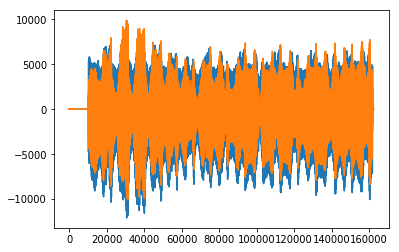

In [88]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) <1000] = 0
filtered_sig = fftpack.ifft(high_freq_fft)
plt.plot(data)
plt.plot(filtered_sig)

In [89]:
signal=np.int16(filtered_sig)
wav.write("./filteredsaxo2.wav",rate=44100,data=signal)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [95]:
x=2000*np.random.normal(0,1,200000)

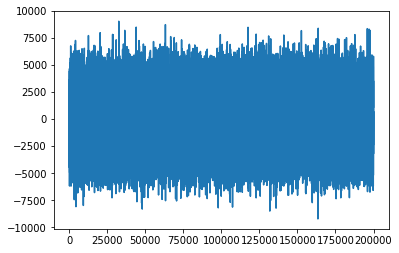

In [96]:
plt.plot(x)

(0, 3000)

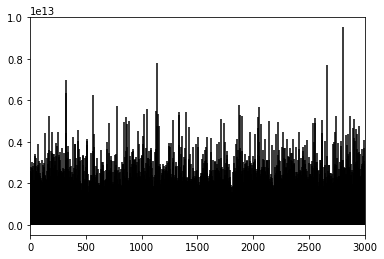

In [102]:
sig_fft = fftpack.fft(x)
power = np.abs(sig_fft)**2
# The corresponding frequencies
sample_freq = fftpack.fftfreq(len(x), d=dt)
plt.vlines(sample_freq, 0,power)
plt.xlim(0,3000)

In [97]:
signal=np.int16(x)
wav.write("./whitenoise.wav",rate=44100,data=signal)

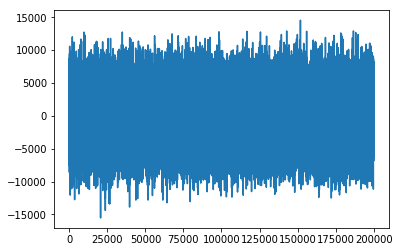

In [126]:
x=2000*np.random.normal(0,1,200000)
y=np.zeros_like(x)
y[0]=x[0]
for n in range(1,len(y)):
    y[n]=0.8*y[n-1]+x[n]
plt.plot(y)

In [120]:
signal=np.int16(y)
wav.write("./ARnoise.wav",rate=44100,data=signal)

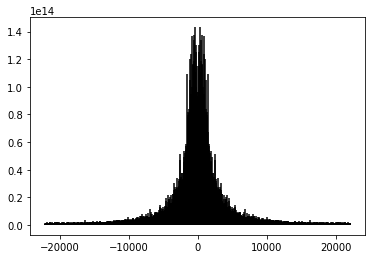

In [121]:
sig_fft = fftpack.fft(y)
power = np.abs(sig_fft)**2
# The corresponding frequencies
sample_freq = fftpack.fftfreq(len(y), d=dt)
plt.vlines(sample_freq, 0,power)
#plt.xlim(0,5000)

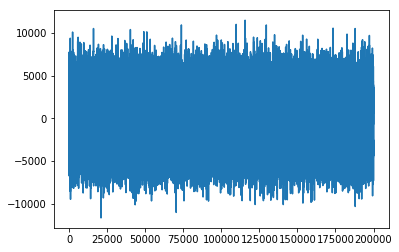

In [145]:
x=2000*np.random.normal(0,1,200000)
y=np.zeros_like(x)
y[0]=x[0]
for n in range(1,len(y)):
    y[n]=0.8*x[n-1]+x[n]
plt.plot(y)

In [146]:
signal=np.int16(y)
wav.write("./MAnoise.wav",rate=44100,data=signal)

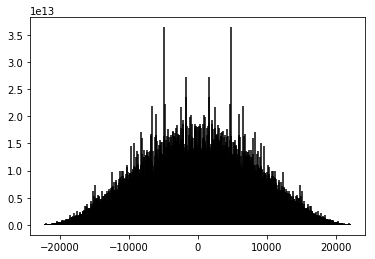

In [147]:
sig_fft = fftpack.fft(y)
power = np.abs(sig_fft)**2
# The corresponding frequencies
sample_freq = fftpack.fftfreq(len(y), d=dt)
plt.vlines(sample_freq, 0,power)
#plt.xlim(0,5000)

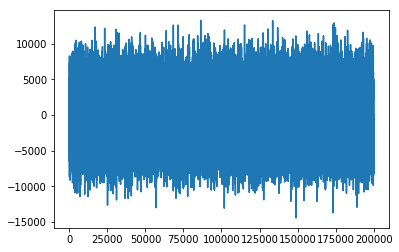

In [151]:
x=2000*np.random.normal(0,1,200000)
y=np.zeros_like(x)
y[0]=x[0]
for n in range(1,len(y)):
    y[n]=0.5*y[n-1]+0.5*x[n-1]+x[n]
plt.plot(y)

In [152]:
signal=np.int16(y)
wav.write("./ARMAnoise.wav",rate=44100,data=signal)

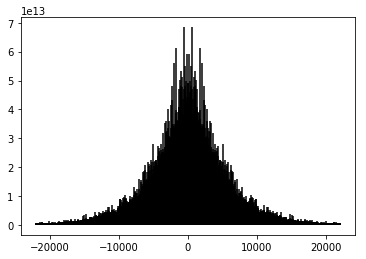

In [153]:
sig_fft = fftpack.fft(y)
power = np.abs(sig_fft)**2
# The corresponding frequencies
sample_freq = fftpack.fftfreq(len(y), d=dt)
plt.vlines(sample_freq, 0,power)
#plt.xlim(0,5000)

In [154]:
sampling,data= wav.read("./voznoise.wav")

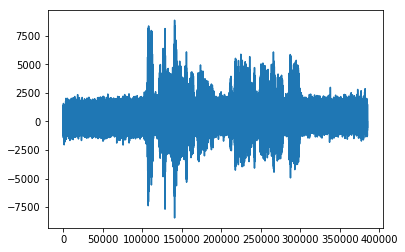

In [157]:
plt.plot(data)

(0, 1000)

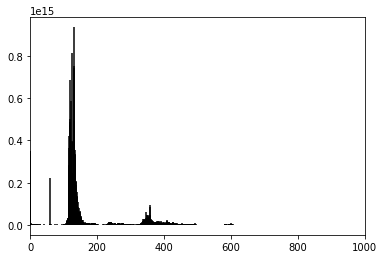

In [171]:
sig_fft = fftpack.fft(data-np.mean(data))
power = np.abs(sig_fft)**2
# The corresponding frequencies
sample_freq = fftpack.fftfreq(len(data), d=dt)


(0, 10000)

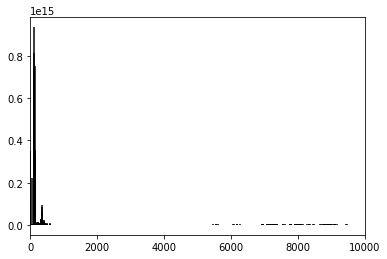

In [184]:
plt.vlines(sample_freq, 0,power)
plt.xlim(0,10000)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


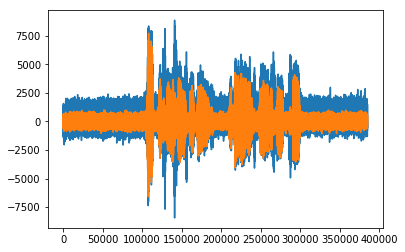

In [246]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) >5000] = 0
high_freq_fft[np.abs(sample_freq) <100] = 0
filtered_sig = fftpack.ifft(high_freq_fft)
plt.plot(data)
plt.plot(filtered_sig)
signal=np.int16(5*filtered_sig)
wav.write("./vozfiltfourier.wav",rate=44100,data=signal)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


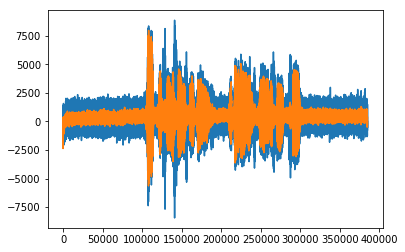

In [239]:
from statsmodels.tsa.holtwinters import Holt
rate, data = wav.read('./voznoise.wav')
dt=data
model = Holt(dt)
fit1 = model.fit(optimized=True)
plt.plot(dt)
plt.plot(fit1.fittedvalues)
signal=np.int16(fit1.fittedvalues)
wav.write("./vozfiltholt.wav",rate=44100,data=signal)

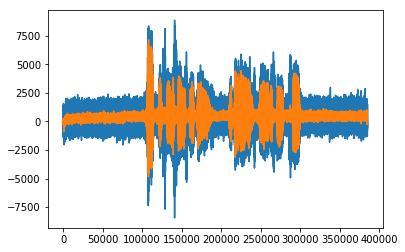

In [238]:
mav=[]
rate, data = wav.read('./voznoise.wav')
dt=data
for l in range(20,len(dt)):
    temp=dt[l-20:l]
    mav.append(np.sum(temp)/len(temp))
plt.plot(dt)
plt.plot(mav)
fil=np.int16(mav)
wav.write("./filtromediamovil.wav", rate,fil)